In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
from keras.preprocessing import image

In [2]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.05, 
                               height_shift_range=0.05, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.05, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

In [3]:
image_gen.flow_from_directory("Train")
image_gen.flow_from_directory("Test")
image_shape = (150,150,3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.3))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])

model.summary()


Found 4179 images belonging to 8 classes.
Found 132 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_______________________________________

In [4]:
batch_size=100
train_image_gen = image_gen.flow_from_directory('Train',
                                                batch_size=batch_size,
                                               target_size=image_shape[:2],
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory("Test", 
                                               batch_size=batch_size,
                                               target_size=image_shape[:2],
                                               class_mode='categorical')

warnings.filterwarnings('ignore')

Found 4179 images belonging to 8 classes.
Found 132 images belonging to 8 classes.


In [5]:
Results=model.fit_generator(train_image_gen,epochs=100, steps_per_epoch=1, validation_data=test_image_gen, validation_steps=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8075 - val_loss: 1.1921e-07 - val_accuracy: 0.8750
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8375 - val_loss: 1.1921e-07 - val_accuracy: 0.8750
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8075 - val_loss: 1.1921e-07 - val_accuracy: 0.8675
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8075 - val_loss: 1.1921e-07 - val_accuracy: 0.8600
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.7925 - val_loss: 1.1921e-07 - val_accuracy: 0.8525
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8150 - val_loss: 1.1921e-07 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================]

1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8525 - val_loss: 1.1921e-07 - val_accuracy: 0.8675
Epoch 56/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8000 - val_loss: 1.1921e-07 - val_accuracy: 0.8600
Epoch 57/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8075 - val_loss: 1.1921e-07 - val_accuracy: 0.8750
Epoch 58/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8375 - val_loss: 1.1921e-07 - val_accuracy: 0.8675
Epoch 59/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8450 - val_loss: 1.1921e-07 - val_accuracy: 0.8675
Epoch 60/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.8450 - val_loss: 1.1921e-07 - val_accuracy: 0.8600
Epoch 61/100
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - accuracy: 0.7925 - val_loss: 1.1921e-07 - val_a

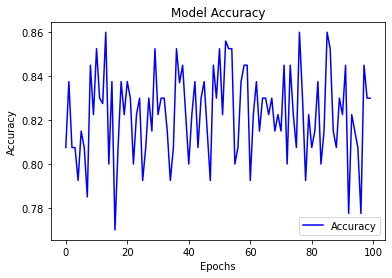

In [6]:
loss_train = Results.history['accuracy']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'b', label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

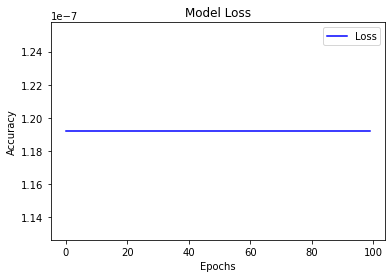

In [7]:
loss_train = Results.history['loss']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'b', label='Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model.save("my_model")

import tensorflow as tf
from tensorflow import keras
result=keras.models.load_model("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets


In [68]:
dic = {'0': "Avermectin and Pyriproxyfen", 
       '1': "organophosphates and synthetic pyrethroids", 
       '2': "NeemAzal",
       '4': "flubendiamide, spinosad and chlorfenapyr", 
       '5': "Flufenoxuron, imidacloprid and chlorfluazuron",
       '6': "Pyrethroids-Pyrethrins (3A)",
       '7': "A bait spray consists of a suitable insecticide (e.g. malathion) mixed with a protein bait(hydrolysed protein)."
      }

In [101]:
file = "whiteFlies.jfif"

img = image.load_img(file, target_size=(150, 150))
img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

h = result.predict_classes(img)
label_map = (train_image_gen.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in h[:,0]] # YFIT[:,0] INSURES THAT THE ARRAY IS READ IN THE RIGHT SHAPE
print(predictions) 

['BA']


In [102]:
def recommend(Class):
    if Class == ['BA']:
        print("Avermectin and Pyriproxyfen")
    elif Class == ['HA']:
        print("organophosphates and synthetic pyrethroids")
    elif Class == ['MP']:
        print("NeemAzal")
    elif Class == ['SE']:
        print("Bacillus thuringiensis var. kurstaki and matrin")
    elif Class == ['SL']:
        print("flubendiamide, spinosad and chlorfenapyr")
    elif Class == ['TP']:
        print("Flufenoxuron, imidacloprid and chlorfluazuron")
    elif Class == ['TU']:
        print("Pyrethroids-Pyrethrins (3A)")
    elif Class == ['ZC']:
        print("A bait spray consists of a suitable insecticide (e.g. malathion) mixed with a protein bait(hydrolysed protein).")
    

In [103]:
recommend(predictions)

Avermectin and Pyriproxyfen


In [63]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from PIL import Image
import plotly.express as px
import requests
import numpy as np
import torch
import torchvision.transforms as T
from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from jupyter_dash import JupyterDash
from keras.preprocessing import image

# #tensor libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras

torch.hub.set_dir("./")


def format_label(label):
    label = " ".join(label.split()[1:])
    label = ",".join(label.split(",")[:3])
    return label


def Header(name, app):
    title = html.H3(name, style={"margin-top": 15})
    logo = html.Img(
        src=app.get_asset_url("dash-logo.png"), style={"float": "right", "height": 60}
    )
    link = html.A(logo, href="https://plotly.com/dash/")
    return dbc.Row([dbc.Col(title, md=8), dbc.Col(link, md=4)])


# Load URLs and classes
RANDOM_URLS = open("urls/random_imagenet.txt").read().split("\n")[:-1]
CLASSES = np.array(
    [format_label(x) for x in open("imagenet_labels.txt").read().split("\n")]
)

# Load image transforms
# transform = T.Compose(
#     [
#         T.Resize(224, interpolation=3),
#         T.CenterCrop(224),
#         T.ToTensor(),
#         T.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
#     ]
# )

# Load model and send it to CPU or GPU
#DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = torch.hub.load(
#     "facebookresearch/deit:main", "deit_base_patch16_224", pretrained=True
# )
# model.eval().to(DEVICE)


#model 
my_model=tf.keras.models.load_model("my_model")

app = JupyterDash(__name__,external_stylesheets=[dbc.themes.BOOTSTRAP])
# app = dash.Dash(_name_, external_stylesheets=[dbc.themes.BOOTSTRAP])
# server = app.server

app.layout = dbc.Container(
    [
        Header("Pest Classification", app),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(
                    md=7,
                    children=[
                        dcc.Graph(id="stats-display"),
                        html.P("Input Image URL:"),
                        dbc.Input(
                            id="input-url",
                            placeholder='Insert URL and click on "Run"...',
                        ),
                    ],
                ),
                dbc.Col(
                    md=5,
                    children=[
                        dcc.Graph(id="image-display"),
                        html.P("Controls:"),
                        dbc.ButtonGroup(
                            [
                                dbc.Button(
                                    "Run", id="btn-run", color="primary", n_clicks=0
                                ),
                                dbc.Button(
                                    "Random",
                                    id="btn-random",
                                    color="primary",
                                    outline=True,
                                    n_clicks=0,
                                ),
                            ],
                            style={"width": "100%"},
                        ),
                    ],
                ),
            ]
        ),
    ],
    fluid=True,
)


@app.callback(
    [Output("btn-run", "n_clicks"), Output("input-url", "value")],
    [Input("btn-random", "n_clicks")],
    [State("btn-run", "n_clicks")],
)
def randomize(n_random, n_run):
    return n_run + 1, RANDOM_URLS[n_random % len(RANDOM_URLS)]


@app.callback(
    [Output("image-display", "figure"), Output("stats-display", "figure")],
    [Input("btn-run", "n_clicks"), Input("input-url", "n_submit")],
    [State("input-url", "value")],
)
def run_model(n_clicks, n_submit, url):
    try:
        im = Image.open(requests.get(url, stream=True).raw)
#         im=image.load_img(requests.get(url, stream=True).raw, target_size=(150, 150))
    except Exception as e:
        print(e)
        return px.scatter(title="Error: " + e)
    fig = px.imshow(im, title="Original Image")
    im=im.resize((150,150))
    
    img = np.asarray(im)

    img = np.expand_dims(img, axis=0)
    img = img/255

#     fig = px.imshow(im, title="Original Image")

#     im_pt = transform(im).unsqueeze(0)
#     with torch.no_grad():
#         preds = torch.softmax(model(im_pt), dim=1)
#         scores = preds.numpy().squeeze()

#     topk_idx = scores.argsort()[::-1][:10]
#     top_classes = CLASSES[topk_idx][::-1]
#     top_scores = scores[topk_idx][::-1]
    result=[0,0,0,0,0,0,0,0]     
    a=np.argmax(my_model.predict(img), axis=-1)
    b=a.item()
    result[b]=1
    scores_fig = px.bar(
#         x=top_scores,
#         y=top_classes,
        y=['BA','HA','MP','SE','SL',"TP",'TU','ZC'],
        x=result,
        labels=dict(x="Confidence", y="Classes"),
        title="ImageNet predictions by DEiT-base",
        orientation="h",
    )

    return fig, scores_fig

app.run_server(mode='external', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

# if _name_ == "_main_":
#     app.run_server(debug=True)

Dash app running on http://127.0.0.1:8090/
